In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [2]:
qr=QuantumRegister(2,name='qr')
anci=QuantumRegister(3,name='anci')
cr=ClassicalRegister(2,name='cr')


In [3]:
backend=BasicAer.get_backend('qasm_simulator')
def circuit(a):
    qc.cx(qr[0],anci[0])
    qc.x(anci[0])
    qc.cu(a,-pi/2,pi/2,0,anci[0],qr[0])
    qc.x(anci[0])
    qc.cx(anci[0],qr[0])
    qc.cx(qr[0],anci[2])
    qc.x(anci[2])
    qc.h(anci[2])
    qc.h(qr[1])
    qc.cx(qr[1],anci[2])
    qc.h(qr[1])
    qc.h(anci[2])
    qc.x(anci[2])
    qc.x(anci[0])
    qc.cu(a,-pi/2,pi/2,0,anci[0],qr[1])
    qc.x(anci[0])
    qc.cx(qr[0],qr[1])
    qc.h(anci[2])
    qc.cx(anci[2],qr[1])
    qc.cx(anci[2],qr[0])
    qc.h(anci[2])
    qc.ch(anci[2],qr[0])
    qc.barrier()
    qc.measure(0,0)
    qc.measure(1,1)

In [7]:
t=arange(0,0.005,0.0001)
w=1
phi=0
m=1
def f(t):
    A=1
    return((A*cos(w*t + phi))/sqrt(2*m))

In [8]:
p=[]
q=[]
r=[]
s=[]
theta=[b*f(b) for b in t]

qc=QuantumCircuit(qr,anci,cr)

for a in theta:
    circuit(a)
    counts=execute(qc,backend,shots=1024).result().get_counts()
    p.append(counts['00']/1024)
    q.append(counts['01']/1024)
    s.append(counts['10']/1024)
    r.append(counts['11']/1024)
    qc.reset(qr)
    qc.reset(anci)

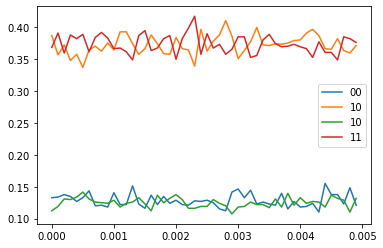

In [9]:
plot(t,p,label='00')
plot(t,q,label='10')
plot(t,r,label='10')
plot(t,s,label='11')
legend()